In [1]:
#Main libraries
import geopandas
import numpy as np
import pandas as pd
import seaborn as sb
import streamlit as sl
import matplotlib.pyplot as plt

----

# Global Trends in Mental Health Disorders

Let's open the dataset "Global Trends in Mental Health Disorders" from Kaggle. <br>
The description is the following: <br>
*"This dataset contains informative data from countries across the globe about the prevalence of mental health disorders including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression and alcohol use disorders."*
<br>
Data are collected through an Excel file.

In [2]:
data_df = pd.read_csv('Mental health Depression disorder Data.csv')

C:\Users\ut1264\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let's start exploring the dataset.

In [3]:
data_df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
data_df.shape

(108553, 11)

The dataset contains 108553 rows and 11 columns. <br> The columns are: <br>
* **index**: row number;
* **Entity**: country/region to which the rates are associated;
* **Code**: country/region code to which the rates are associated;
* **Year**: year in which the rates were calculated.
* **Schizophrenia (%)**: percentage of people in a specified country/region and year suffering from schizophrenia. <br> *Schizophrenia is a mental disorder characterized by continuous or relapsing episodes of psychosis.* $*$
* **Bipolar disorder (%)**: percentage of people in a specified country/region and year suffering from bipolar disorder. <br> *Bipolar disorder is a mental disorder characterized by periods of depression and periods of abnormally elevated mood that last from days to weeks each.* $*$
* **Eating disorders (%)**: percentage of people in a specified country/region and year suffering from eating disorders. <br> *Eating disorders are a cluster of mental disorders defined by abnormal eating behaviors that negatively affect a person's physical or mental health.* $*$
* **Anxiety disorders (%)**: percentage of people in a specified country/region and year suffering from anxiety disorders. <br> *Anxiety disorders are a cluster of mental disorders characterized by significant and uncontrollable feelings of anxiety and fear such that a person's social, occupational, and personal function are significantly impaired.* $*$
* **Drug use disorders (%)**: percentage of people in a specified country/region and year suffering from drug use disorders. <br> *Drug use disorder is the persistent use of drugs despite substantial harm and adverse consequences as a result of their use, characterized by an array of mental/emotional, physical, and behavioral problems.* $*$
* **Depression (%)**: percentage of people in a specified country/region and year suffering from depression. <br> *Depression is a mental and behavioral disorder characterized by low mood and aversion to activity.* $*$
* **Alcohol use disorders (%)**: percentage of people in a specified country/region and year suffering from alcohol use disorders (%). <br> *Alcohol use disorder, or alcoholism, is any drinking of alcohol that results in significant mental or physical health problems. It's similar to drug use disorder.* $*$

<br> Rates are calculated by dividing the number of people affected with a certain mental disorder with the the total of the population in that year.

$*$ *from Wikipedia*

## PRELIMINARY ANALYSIS

In [5]:
data_df.tail()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN
108552,108552,Zimbabwe,ZWE,2017,340583.157405,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


From this very first exploration, we can already see some oddities. <br>
For example, the last rows of the dataset for the column *Schizophrenia (%)* contain numbers that don't look like percentages at all. <br>Another thing we can notice is that the columns *Year, Schizophrenia (%), Bipolar disorder (%) and Eating disorders (%)* are object type, even though we would expect them to be float type. <br> Furthermore, last columns *Anxiety disorders (%), Drug use disorders (%), Depression (%) and Alcohol use disorders (%)* have only 6468 non-null values. In particular, in the dataset we have a lot of null values which number differ between columns.

In [7]:
data_df.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867833
max,108552.000000,8.967330,3.452476,6.602754,5.474668


In [8]:
data_df.describe(include=object)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%)
count,108553,103141,108553,25875,19406,100236
unique,276,236,259,25661,19358,72657
top,Sweden,GRC,2003,0.191897,0.603732,6000
freq,496,496,1012,3,3,165


From these commands, we can see that the most common mental disorder is, in average, Anxiety disorder. However, this statement may not be true since we don't have statistics for *Schizophrenia (%), Bipolar disorder (%)* and *Eating disorders (%)*. Moreover we need to analyze the abnormalities of the dataset before doing any affirmation on the data.

Let's look at the values for *Entity* more in depth.

In [9]:
data_df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern 

The values for the column *Entity* are not only countries, but also regions, islands and broader areas. We can also notice the value "Entity", which will be the object of a further analysis.

Let's do the same type of analysis for the column *Year*.

In [10]:
data_df['Year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Year', '1800', '1801', '1802',
       '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810',
       '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818',
       '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826',
       '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834',
       '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842',
       '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850',
       '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858',
       '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866',
       '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874',
       '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882',
      

The column *Year* contains numbers from 1800 to 2019, but also some other strange values, for examples BCE years and the value "Year". *Year* will need to be fixed in order to have reliable values.

From this preliminary analysis, we can already state that this dataset is really "dirty": for this reason, it is necessary to clean the data before doing any further consideration.

*****

## DATA CLEANING

First of all, we should investigate the abnormal values "Entity" and "Year" in the columns *Entity* and *Year*.

In [11]:
data_df[data_df['Entity']=='Entity']

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6468,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
54276,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
102084,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_df[data_df['Year']=='Year']

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6468,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
54276,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
102084,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN


Rows number 6468, 54276 and 102084 contain string values that look like headers for other tables. This suggest us that the dataframe is actually made of different tables concatenated to each other. We must divide them and study them as single tables.

In [13]:
data1=data_df[:6468] #First table
data1

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [14]:
data2=data_df[6468:54276]
data2

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
6468,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
6469,6469,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6470,6470,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6471,6471,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6472,6472,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54271,54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN
54272,54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN
54273,54273,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000,NaN,NaN,NaN,NaN
54274,54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000,NaN,NaN,NaN,NaN


In [15]:
data3=data_df[54276:102084]
data3

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
54276,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
54277,54277,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54278,54278,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54279,54279,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54280,54280,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
102079,102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0,NaN,NaN,NaN,NaN
102080,102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0,NaN,NaN,NaN,NaN
102081,102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0,NaN,NaN,NaN,NaN
102082,102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN,NaN,NaN,NaN


In [16]:
data4=data_df[102084:]
data4

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
102084,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN
102085,102085,Afghanistan,AFG,1990,318435.81367,NaN,NaN,NaN,NaN,NaN,NaN
102086,102086,Afghanistan,AFG,1991,329044.773956,NaN,NaN,NaN,NaN,NaN,NaN
102087,102087,Afghanistan,AFG,1992,382544.572895,NaN,NaN,NaN,NaN,NaN,NaN
102088,102088,Afghanistan,AFG,1993,440381.507393,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


By dividing the 4 tables, we see that they can give us more information about our topic. <br> The first row of each table contains the column names of the respective table. Furthermore, every table has a different number of columns. We can isolate only the relevant column for each table.

In [17]:
new_header = data2.iloc[0] #grab the first row for the header
data2.columns = new_header
data2=data2[1:]
data2

6468,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
6469,6469,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6470,6470,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6471,6471,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6472,6472,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6473,6473,Afghanistan,AFG,1804,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54271,54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN
54272,54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN
54273,54273,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000,NaN,NaN,NaN,NaN
54274,54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000,NaN,NaN,NaN,NaN


In [18]:
data2=data2[['Entity','Code','Year','Prevalence in males (%)','Prevalence in females (%)','Population']]
data2

6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
6469,Afghanistan,AFG,1800,NaN,NaN,3280000
6470,Afghanistan,AFG,1801,NaN,NaN,3280000
6471,Afghanistan,AFG,1802,NaN,NaN,3280000
6472,Afghanistan,AFG,1803,NaN,NaN,3280000
6473,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000
54273,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000
54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000


In [19]:
new_header = data3.iloc[0] #grab the first row for the header
data3.columns = new_header
data3=data3[1:]
data3

54276,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population,NaN,NaN,NaN,NaN
54277,54277,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54278,54278,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54279,54279,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54280,54280,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54281,54281,Afghanistan,AFG,1804,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
102079,102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0,NaN,NaN,NaN,NaN
102080,102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0,NaN,NaN,NaN,NaN
102081,102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0,NaN,NaN,NaN,NaN
102082,102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN,NaN,NaN,NaN


In [20]:
data3=data3[['Entity','Code','Year','Suicide rate (deaths per 100,000 individuals)','Depressive disorder rates (number suffering per 100,000)','Population']]
data3

54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
54277,Afghanistan,AFG,1800,NaN,NaN,3280000
54278,Afghanistan,AFG,1801,NaN,NaN,3280000
54279,Afghanistan,AFG,1802,NaN,NaN,3280000
54280,Afghanistan,AFG,1803,NaN,NaN,3280000
54281,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0
102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0
102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [21]:
new_header = data4.iloc[0] #grab the first row for the header
data4.columns = new_header
data4=data4[1:]
data4

102084,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),NaN,NaN,NaN,NaN,NaN,NaN
102085,102085,Afghanistan,AFG,1990,318435.81367,NaN,NaN,NaN,NaN,NaN,NaN
102086,102086,Afghanistan,AFG,1991,329044.773956,NaN,NaN,NaN,NaN,NaN,NaN
102087,102087,Afghanistan,AFG,1992,382544.572895,NaN,NaN,NaN,NaN,NaN,NaN
102088,102088,Afghanistan,AFG,1993,440381.507393,NaN,NaN,NaN,NaN,NaN,NaN
102089,102089,Afghanistan,AFG,1994,456916.645489,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data4=data4[['Entity','Code','Year','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)']]
data4

102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
102085,Afghanistan,AFG,1990,318435.81367
102086,Afghanistan,AFG,1991,329044.773956
102087,Afghanistan,AFG,1992,382544.572895
102088,Afghanistan,AFG,1993,440381.507393
102089,Afghanistan,AFG,1994,456916.645489
...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359
108549,Zimbabwe,ZWE,2014,311665.769283
108550,Zimbabwe,ZWE,2015,320638.507158
108551,Zimbabwe,ZWE,2016,330437.353798


Now we can focus on the single tables.

#### TABLE 1

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      6468 non-null   int64  
 1   Entity                     6468 non-null   object 
 2   Code                       5488 non-null   object 
 3   Year                       6468 non-null   object 
 4   Schizophrenia (%)          6468 non-null   object 
 5   Bipolar disorder (%)       6468 non-null   object 
 6   Eating disorders (%)       6468 non-null   object 
 7   Anxiety disorders (%)      6468 non-null   float64
 8   Drug use disorders (%)     6468 non-null   float64
 9   Depression (%)             6468 non-null   float64
 10  Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 556.0+ KB


In the first table, we have some null values for the column *Code*.

In [24]:
data1[data1['Code'].isnull()]

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
112,112,Andean Latin America,NaN,1990,0.195471,0.870564,0.28782,4.217677,0.608921,2.621781,1.748912
113,113,Andean Latin America,NaN,1991,0.195484,0.870876,0.289362,4.220261,0.610489,2.631717,1.743910
114,114,Andean Latin America,NaN,1992,0.195497,0.871174,0.290563,4.222587,0.611990,2.639932,1.738703
115,115,Andean Latin America,NaN,1993,0.195523,0.871482,0.291833,4.224721,0.613995,2.646096,1.733697
116,116,Andean Latin America,NaN,1994,0.195569,0.871823,0.293111,4.226690,0.616448,2.651022,1.729266
...,...,...,...,...,...,...,...,...,...,...,...
6351,6351,Western Sub-Saharan Africa,NaN,2013,0.173905,0.635737,0.136469,2.899641,0.477964,3.805780,0.966526
6352,6352,Western Sub-Saharan Africa,NaN,2014,0.174254,0.636185,0.138116,2.902038,0.480415,3.787750,0.967383
6353,6353,Western Sub-Saharan Africa,NaN,2015,0.174616,0.636682,0.139784,2.904311,0.482921,3.762850,0.968057
6354,6354,Western Sub-Saharan Africa,NaN,2016,0.17498,0.637211,0.141193,2.906350,0.485547,3.733871,0.968472


The rows without a country code are the ones which probabily refer to regions and areas. 

In [25]:
data1[data1['Code'].isnull()]['Entity'].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

To standardize our further analysis, we decide to eliminate regions, areas and continents from our dataset and keep only entities that have a code. We can't simply drop the rows that have null-values for *Code*, because in this list we are actually see some entities that are not countries, which means that there are some regions and areas that have a code.
<br>One example is the value "World" that we have seen in the preliminary analysis for the exploration of the column *Entity*.

In [26]:
data1[data1['Entity']=='World']['Code'].unique()

array(['OWID_WRL'], dtype=object)

To make sure we take data for countries only, we search on Google a list of countries and we load it in our script. We will keep in our dataset only the rows with those specific codes. This will give us a high degree of accuracy on identifying real and authentic countries.

In [27]:
#https://gist.github.com/ivikramsahu/37c09b97aea08cd708ceba196d01394a

In [180]:
countries=pd.read_csv('countries_codes_and_coordinates.csv')
countries=countries['Alpha-3 code']
countries

0       "AFG"
1       "ALB"
2       "DZA"
3       "ASM"
4       "AND"
        ...  
251     "WLF"
252     "ESH"
253     "YEM"
254     "ZMB"
255     "ZWE"
Name: Alpha-3 code, Length: 256, dtype: object

In [29]:
countries=countries.map(lambda x:x.replace('"',''))
countries=countries.map(lambda x:x.replace(' ',''))
countries

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
251    WLF
252    ESH
253    YEM
254    ZMB
255    ZWE
Name: Alpha-3 code, Length: 256, dtype: object

In [30]:
countries

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
251    WLF
252    ESH
253    YEM
254    ZMB
255    ZWE
Name: Alpha-3 code, Length: 256, dtype: object

In [31]:
data1=data1.loc[data1['Code'].isin(countries)]

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5460 entries, 0 to 6467
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      5460 non-null   int64  
 1   Entity                     5460 non-null   object 
 2   Code                       5460 non-null   object 
 3   Year                       5460 non-null   object 
 4   Schizophrenia (%)          5460 non-null   object 
 5   Bipolar disorder (%)       5460 non-null   object 
 6   Eating disorders (%)       5460 non-null   object 
 7   Anxiety disorders (%)      5460 non-null   float64
 8   Drug use disorders (%)     5460 non-null   float64
 9   Depression (%)             5460 non-null   float64
 10  Alcohol use disorders (%)  5460 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 511.9+ KB


We have eliminated all the null values for the first table. <br> Now let's tranform data in the right data type.

In [33]:
data1['Schizophrenia (%)'] = pd.to_numeric(data1['Schizophrenia (%)'])
data1['Bipolar disorder (%)'] = pd.to_numeric(data1['Bipolar disorder (%)'])
data1['Eating disorders (%)'] = pd.to_numeric(data1['Eating disorders (%)'])
data1['Year'] = pd.to_numeric(data1['Year'])

<ipython-input-33-18125d71bebc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Schizophrenia (%)'] = pd.to_numeric(data1['Schizophrenia (%)'])
<ipython-input-33-18125d71bebc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Bipolar disorder (%)'] = pd.to_numeric(data1['Bipolar disorder (%)'])
<ipython-input-33-18125d71bebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

We can eliminate the column *Index* since it's redondant and we can change the name of the column *Entity* to *Country*.

In [34]:
data1=data1.drop('index', axis=1)
data1.index = range(len(data1))
data1.rename(columns={"Entity": "Country"}, inplace=True)
data1

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
5456,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
5457,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
5458,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


#### TABLE 2

We want to standardize data between the different tables, so we decide to keep only the countries we have in the first table.

In [35]:
countries2=data1['Country']

In [36]:
data2=data2.loc[data2['Entity'].isin(countries2)]
data2

6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
6469,Afghanistan,AFG,1800,NaN,NaN,3280000
6470,Afghanistan,AFG,1801,NaN,NaN,3280000
6471,Afghanistan,AFG,1802,NaN,NaN,3280000
6472,Afghanistan,AFG,1803,NaN,NaN,3280000
6473,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000
54273,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000
54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41850 entries, 6469 to 54275
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Entity                     41850 non-null  object
 1   Code                       41850 non-null  object
 2   Year                       41850 non-null  object
 3   Prevalence in males (%)    5460 non-null   object
 4   Prevalence in females (%)  5460 non-null   object
 5   Population                 41850 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In the second table we have a lot of null-values for the data referring to prevalences. Let's look at them more in detail.

In [38]:
data2[data2['Prevalence in males (%)'].isnull()]

6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
6469,Afghanistan,AFG,1800,NaN,NaN,3280000
6470,Afghanistan,AFG,1801,NaN,NaN,3280000
6471,Afghanistan,AFG,1802,NaN,NaN,3280000
6472,Afghanistan,AFG,1803,NaN,NaN,3280000
6473,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
54243,Zimbabwe,ZWE,1987,NaN,NaN,9527000
54244,Zimbabwe,ZWE,1988,NaN,NaN,9849000
54245,Zimbabwe,ZWE,1989,NaN,NaN,10154000.000000
54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000


In [39]:
data2[data2['Prevalence in males (%)'].notnull()]['Year'].unique() 

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'], dtype=object)

Data are available only in the range of years between 1990 and 2017. This is a reasonable range of time, since we have grown more awarness of mental health disorders in the last years. Taking data from the beginning of 1900's, or even from 1800's, would give us absurd values with a really low level of accuracy. <br> So we keep only the rows that refer to this range of years (1990-2017). 

In [40]:
range_years=list(data2[data2['Prevalence in males (%)'].notnull()]['Year'].unique())
data2=data2[data2.Year.str.contains('|'.join(range_years))]
data2

6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
6659,Afghanistan,AFG,1990,3.499982,4.647815,12412000.000000
6660,Afghanistan,AFG,1991,3.503947,4.655772,13299000.000000
6661,Afghanistan,AFG,1992,3.508912,4.662066,14486000.000000
6662,Afghanistan,AFG,1993,3.513429,4.669012,15817000.000000
6663,Afghanistan,AFG,1994,3.515578,4.67305,17076000.000000
...,...,...,...,...,...,...
54269,Zimbabwe,ZWE,2013,2.769193,3.424106,13350000.000000
54270,Zimbabwe,ZWE,2014,2.778101,3.437674,13587000.000000
54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000


In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5460 entries, 6659 to 54273
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Entity                     5460 non-null   object
 1   Code                       5460 non-null   object
 2   Year                       5460 non-null   object
 3   Prevalence in males (%)    5460 non-null   object
 4   Prevalence in females (%)  5460 non-null   object
 5   Population                 5460 non-null   object
dtypes: object(6)
memory usage: 298.6+ KB


We have eliminated all the null values in the second table.
Let's standardize the data types and column names as we did for the first one.

In [42]:
data2['Prevalence in males (%)'] = pd.to_numeric(data2['Prevalence in males (%)'])
data2['Prevalence in females (%)'] = pd.to_numeric(data2['Prevalence in females (%)'])
data2['Population'] = pd.to_numeric(data2['Population'])
data2['Year'] = pd.to_numeric(data2['Year'])

<ipython-input-42-1ec1b0674588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Prevalence in males (%)'] = pd.to_numeric(data2['Prevalence in males (%)'])
<ipython-input-42-1ec1b0674588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Prevalence in females (%)'] = pd.to_numeric(data2['Prevalence in females (%)'])
<ipython-input-42-1ec1b0674588>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [43]:
data2.index = range(len(data2))
data2.rename(columns={"Entity": "Country"}, inplace=True)
data2

C:\Users\ut1264\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


6468,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
0,Afghanistan,AFG,1990,3.499982,4.647815,12412000.0
1,Afghanistan,AFG,1991,3.503947,4.655772,13299000.0
2,Afghanistan,AFG,1992,3.508912,4.662066,14486000.0
3,Afghanistan,AFG,1993,3.513429,4.669012,15817000.0
4,Afghanistan,AFG,1994,3.515578,4.673050,17076000.0
...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,2.769193,3.424106,13350000.0
5456,Zimbabwe,ZWE,2014,2.778101,3.437674,13587000.0
5457,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.0
5458,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.0


#### TABLE 3

For cleaning this table, we follow the same steps as the second table.

In [44]:
data3=data3.loc[data3['Entity'].isin(countries2)]
data3

54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
54277,Afghanistan,AFG,1800,NaN,NaN,3280000
54278,Afghanistan,AFG,1801,NaN,NaN,3280000
54279,Afghanistan,AFG,1802,NaN,NaN,3280000
54280,Afghanistan,AFG,1803,NaN,NaN,3280000
54281,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0
102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0
102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [45]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41850 entries, 54277 to 102083
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Entity                                                    41850 non-null  object
 1   Code                                                      41850 non-null  object
 2   Year                                                      41850 non-null  object
 3   Suicide rate (deaths per 100,000 individuals)             5460 non-null   object
 4   Depressive disorder rates (number suffering per 100,000)  5460 non-null   object
 5   Population                                                41850 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In [46]:
data3=data3[data3.Year.str.contains('|'.join(range_years))]
data3

54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
54467,Afghanistan,AFG,1990,10.318504,4039.755763,12412000.000000
54468,Afghanistan,AFG,1991,10.32701,4046.256034,13299000.000000
54469,Afghanistan,AFG,1992,10.271411,4053.709902,14486000.000000
54470,Afghanistan,AFG,1993,10.376123,4060.203474,15817000.000000
54471,Afghanistan,AFG,1994,10.575915,4062.290365,17076000.000000
...,...,...,...,...,...,...
102077,Zimbabwe,ZWE,2013,28.3612,3048.264249,13350000.0
102078,Zimbabwe,ZWE,2014,27.605547,3056.996704,13587000.0
102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0


In [47]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5460 entries, 54467 to 102081
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Entity                                                    5460 non-null   object
 1   Code                                                      5460 non-null   object
 2   Year                                                      5460 non-null   object
 3   Suicide rate (deaths per 100,000 individuals)             5460 non-null   object
 4   Depressive disorder rates (number suffering per 100,000)  5460 non-null   object
 5   Population                                                5460 non-null   object
dtypes: object(6)
memory usage: 298.6+ KB


In [48]:
data3['Suicide rate (deaths per 100,000 individuals)'] = pd.to_numeric(data3['Suicide rate (deaths per 100,000 individuals)'])
data3['Depressive disorder rates (number suffering per 100,000)'] = pd.to_numeric(data3['Depressive disorder rates (number suffering per 100,000)'])
data3['Population'] = pd.to_numeric(data3['Population'])
data3['Year'] = pd.to_numeric(data3['Year'])

<ipython-input-48-06a793e163c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Suicide rate (deaths per 100,000 individuals)'] = pd.to_numeric(data3['Suicide rate (deaths per 100,000 individuals)'])
<ipython-input-48-06a793e163c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Depressive disorder rates (number suffering per 100,000)'] = pd.to_numeric(data3['Depressive disorder rates (number suffering per 100,000)'])
<ipython-input-48-06a793e163c2>:3: SettingWithCopyWarning: 
A value is try

In [49]:
data3.index = range(len(data3))
data3.rename(columns={"Entity": "Country"}, inplace=True)
data3

C:\Users\ut1264\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


54276,Country,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
0,Afghanistan,AFG,1990,10.318504,4039.755763,12412000.0
1,Afghanistan,AFG,1991,10.327010,4046.256034,13299000.0
2,Afghanistan,AFG,1992,10.271411,4053.709902,14486000.0
3,Afghanistan,AFG,1993,10.376123,4060.203474,15817000.0
4,Afghanistan,AFG,1994,10.575915,4062.290365,17076000.0
...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,28.361200,3048.264249,13350000.0
5456,Zimbabwe,ZWE,2014,27.605547,3056.996704,13587000.0
5457,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
5458,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0


#### TABLE 4

We keep only the countries that are in the other tables.

In [50]:
data4=data4.loc[data4['Entity'].isin(countries2)]
data4

102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
102085,Afghanistan,AFG,1990,318435.81367
102086,Afghanistan,AFG,1991,329044.773956
102087,Afghanistan,AFG,1992,382544.572895
102088,Afghanistan,AFG,1993,440381.507393
102089,Afghanistan,AFG,1994,456916.645489
...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359
108549,Zimbabwe,ZWE,2014,311665.769283
108550,Zimbabwe,ZWE,2015,320638.507158
108551,Zimbabwe,ZWE,2016,330437.353798


In [51]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5460 entries, 102085 to 108552
Data columns (total 4 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Entity                                                                                                     5460 non-null   object
 1   Code                                                                                                       5460 non-null   object
 2   Year                                                                                                       5460 non-null   object
 3   Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)  5460 non-null   object
dtypes: object(4)
memory usage: 213.3+ KB


In [52]:
data4['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'] = pd.to_numeric(data4['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'])
data4['Year'] = pd.to_numeric(data4['Year'])

<ipython-input-52-5d00272b8396>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'] = pd.to_numeric(data4['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'])
<ipython-input-52-5d00272b8396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Year'] = pd.to_numeric(data4['Year'])


For convenience, we change the name of the column *Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)* to only *People suffering from depression*.

In [53]:
data4.index = range(len(data4))
data4.rename(columns={"Entity": "Country"}, inplace=True)
data4.rename(columns={"Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)": "People suffering from depression"}, inplace=True)
data4

C:\Users\ut1264\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


102084,Country,Code,Year,People suffering from depression
0,Afghanistan,AFG,1990,318435.813670
1,Afghanistan,AFG,1991,329044.773956
2,Afghanistan,AFG,1992,382544.572895
3,Afghanistan,AFG,1993,440381.507393
4,Afghanistan,AFG,1994,456916.645489
...,...,...,...,...
5455,Zimbabwe,ZWE,2013,303564.603590
5456,Zimbabwe,ZWE,2014,311665.769283
5457,Zimbabwe,ZWE,2015,320638.507158
5458,Zimbabwe,ZWE,2016,330437.353798


#### MERGE OF THE TABLES

Now that we have standardized data, we can merge all the tables together. In this way, it will be easier and faster to do data analysis and to describe all the info that we have.

In [54]:
data12=pd.merge(data1, data2)
data34=pd.merge(data3, data4)
data=pd.merge(data12, data34)
data

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,2.769193,3.424106,13350000.0,28.361200,3048.264249,303564.603590
5456,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,2.778101,3.437674,13587000.0,27.605547,3056.996704,311665.769283
5457,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,2.789152,3.455323,13815000.0,27.197061,3068.250731,320638.507158
5458,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,2.799308,3.479071,14030000.0,26.839591,3081.782858,330437.353798


## DATA EXPLORATION AND PLOTTING

Now that we have our full normalized dataset, we can describe data in a more accurate way.

New columns:
* **Prevalence in males (%)**: percentage of males in a specified country and year suffering from mental disorders compared to the total of the population;
* **Prevalence in females (%)**: percentage of females in a specified country and year suffering from mental disorders compared to the total of the population;
* **Population**: total of the population in a specified country and year;
* **Suicide rate (deaths per 100,000 individuals)**: number of people in a specified country and year who committed suicide on a total of 100000 individuals;
* **Depressive disorder rates (number suffering per 100,000)**: number of people in a specified country and year who suffer from depression on a total of 100000 individuals;
* **People suffering from depression**: number of people in a specified country and year who suffer from depression;

The meaning of the first columns can be found at the beginning of this notebook.

In [55]:
data.loc[:,data.columns!='Year'].describe().T

,count,mean,std,min,25%,50%,75%,max
Schizophrenia (%),5460.0,2.079477e-01,4.197620e-02,0.146902,1.792623e-01,1.984160e-01,2.300245e-01,3.751100e-01
Bipolar disorder (%),5460.0,7.175347e-01,1.644149e-01,0.314535,6.161215e-01,6.950390e-01,8.313062e-01,1.206597e+00
Eating disorders (%),5460.0,2.342482e-01,1.545072e-01,0.073908,1.215805e-01,1.801770e-01,2.799673e-01,9.439910e-01
Anxiety disorders (%),5460.0,3.947774e+00,1.137662e+00,2.023393,3.176496e+00,3.505739e+00,4.662053e+00,8.967330e+00
Drug use disorders (%),5460.0,8.329144e-01,4.422905e-01,0.383650,5.232507e-01,7.070225e-01,9.055190e-01,3.452476e+00
Depression (%),5460.0,3.474351e+00,6.734499e-01,2.139903,2.953517e+00,3.460046e+00,3.880111e+00,6.602754e+00
Alcohol use disorders (%),5460.0,1.562835e+00,8.641429e-01,0.446940,9.590057e-01,1.469996e+00,1.856625e+00,5.474668e+00
Prevalence in males (%),5460.0,2.796032e+00,5.532570e-01,1.594129,2.395150e+00,2.751387e+00,3.114800e+00,4.905163e+00
Prevalence in females (%),5460.0,4.123462e+00,8.607387e-01,2.348094,3.475976e+00,4.157246e+00,4.594516e+00,8.537801e+00
Population,5460.0,3.292480e+07,1.273055e+08,45000.000000,1.682500e+06,6.703000e+06,2.138550e+07,1.421022e+09


As we expected, anxiety disorders are the most common mental disorders, with a mean of 3.95% people suffering from it in every country and year and a maximum value of 8.97% calculated in New Zealand in 2002.

In [56]:
equal_to_max_mask = data['Anxiety disorders (%)'] == data['Anxiety disorders (%)'].max()
data[equal_to_max_mask] 

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
3456,New Zealand,NZL,2002,0.339223,1.195859,0.635264,8.96733,2.141658,4.125419,1.447662,3.343,4.860577,3963000.0,13.007617,3689.887091,150584.549259


Another mental disorder with high prevalence is depression, with an average of 3.47% people suffering from it and highest value of 6.6% calculated in Greenland in 1995.

In [57]:
equal_to_max_mask = data['Depression (%)'] == data['Depression (%)'].max()
data[equal_to_max_mask] 

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",People suffering from depression
1909,Greenland,GRL,1995,0.315753,0.590903,0.47654,5.648279,1.678836,6.602754,3.489129,4.905163,8.537801,56000.0,87.051938,6096.437594,3591.430256


Standard deviation for depression has value of 0.67, which means that the prevalence of depression is less variable between countries and years than it is for anxiety (std 1.14).

An important result that we can see from the analysis above is the difference of prevalences between males and females suffering from mental disorders. There are 4.12 females that suffer from mental disorders compared to 2.80 males, with a maximum value for females which is almost the double of the males' one! (8.54% vs. 4.9% - both calculated in Greenland in 1995)

By creating the correlation matrix, we can see how much mental disorders are associated with each other. For analysis purpose, for this next step we will use data divided by table.

In [58]:
data1.loc[:,data1.columns!='Year'].corr()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Schizophrenia (%),1.000000,0.240321,0.688552,0.471856,0.405378,0.125853,-0.043847
Bipolar disorder (%),0.240321,1.000000,0.704115,0.654528,0.349550,0.112000,0.061794
Eating disorders (%),0.688552,0.704115,1.000000,0.676386,0.420955,0.194129,0.031803
Anxiety disorders (%),0.471856,0.654528,0.676386,1.000000,0.595179,0.341838,-0.155023
Drug use disorders (%),0.405378,0.349550,0.420955,0.595179,1.000000,0.315943,-0.157054
Depression (%),0.125853,0.112000,0.194129,0.341838,0.315943,1.000000,0.046693
Alcohol use disorders (%),-0.043847,0.061794,0.031803,-0.155023,-0.157054,0.046693,1.000000


Biggest values are between the pairs: schizophrenia and eating disorders (0.69), bipolar disorder and anxiety disorders (0.65), eating disorders and bipolar disorder (0.70) and eating disorders and anxity disorders (0.67). 

We can also see the countries that have, on average, the highest (and lowest) values of prevalence for anxiety disorders and for depression.

In [59]:
data_mean = data1.groupby('Country').mean()
data_mean['Anxiety disorders (%)'].sort_values(ascending=False)[:10]

Country
New Zealand      8.651309
Norway           7.637363
Iran             6.932546
Netherlands      6.816901
United States    6.741584
France           6.686942
Germany          6.633030
Australia        6.550010
Uruguay          6.265410
Chile            6.245018
Name: Anxiety disorders (%), dtype: float64

In [60]:
data_mean['Anxiety disorders (%)'].sort_values(ascending=True)[:10]

Country
Vietnam         2.035264
Tajikistan      2.512893
Mongolia        2.526100
Uzbekistan      2.541929
Kyrgyzstan      2.553457
Turkmenistan    2.556591
Azerbaijan      2.571132
Armenia         2.587095
Kazakhstan      2.592607
Georgia         2.604144
Name: Anxiety disorders (%), dtype: float64

In [61]:
data_mean['Depression (%)'].sort_values(ascending=False)[:10]

Country
Greenland        6.459109
Morocco          5.610298
Lesotho          5.423811
Uganda           5.227817
Finland          5.183080
Iran             4.874333
Palestine        4.818330
Australia        4.795487
United States    4.744655
Portugal         4.699081
Name: Depression (%), dtype: float64

In [62]:
data_mean['Depression (%)'].sort_values(ascending=True)[:10]

Country
Albania                   2.190442
Myanmar                   2.252113
Poland                    2.284375
Colombia                  2.311194
Peru                      2.317500
Romania                   2.351679
Macedonia                 2.377595
Slovakia                  2.480926
Bosnia and Herzegovina    2.500036
Brunei                    2.546714
Name: Depression (%), dtype: float64

The 3 most "anxious" countries are New Zealand, Norway and Iran, while the least one are Vietnam, Tajikistan and Mongolia.
For depression, the countries with the highest prevalence are Greenland, Morocco and Lesotho, while Albania, Myanmar and Poland are the ones with the lowest values.

****

Let's search for some other particolar results in the dataset by plotting the data.

#### DIFFERENCES BETWEEN MENTAL HEALTH DISORDERS (%) in space and time 

To see what are the most common mental disorders in average, we can plot the mean of each mental disorder with a bar plot.

In [70]:
data_for_graphs=data1[['Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]

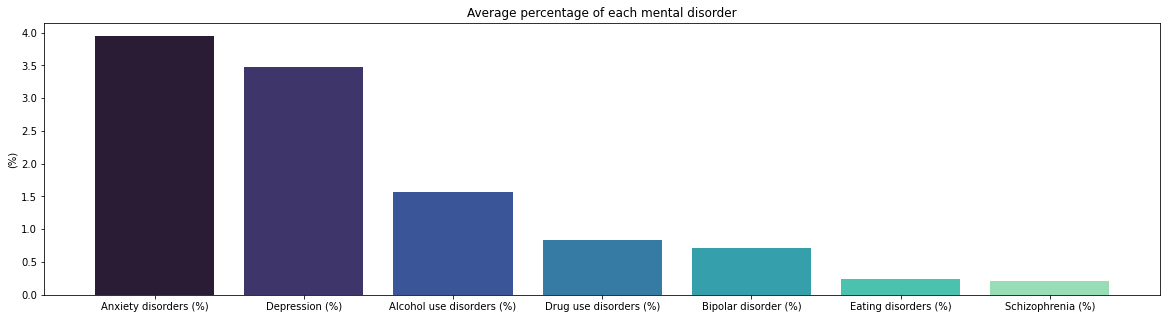

In [71]:
data_for_bar=data_for_graphs.mean().sort_values(ascending=False).reset_index() 
plt.figure(figsize=(20, 5))
plt.bar(data_for_bar['index'], data_for_bar[0], color=sb.color_palette("mako",7))
plt.title('Average percentage of each mental disorder')
plt.ylabel('(%)')
plt.show()

As we said before, anxiety disorder is the most common one, followed by depression and alchool use disorders.

The distribution of all the percentages of each mental disorders are the following:

C:\Users\ut1264\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ut1264\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ut1264\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

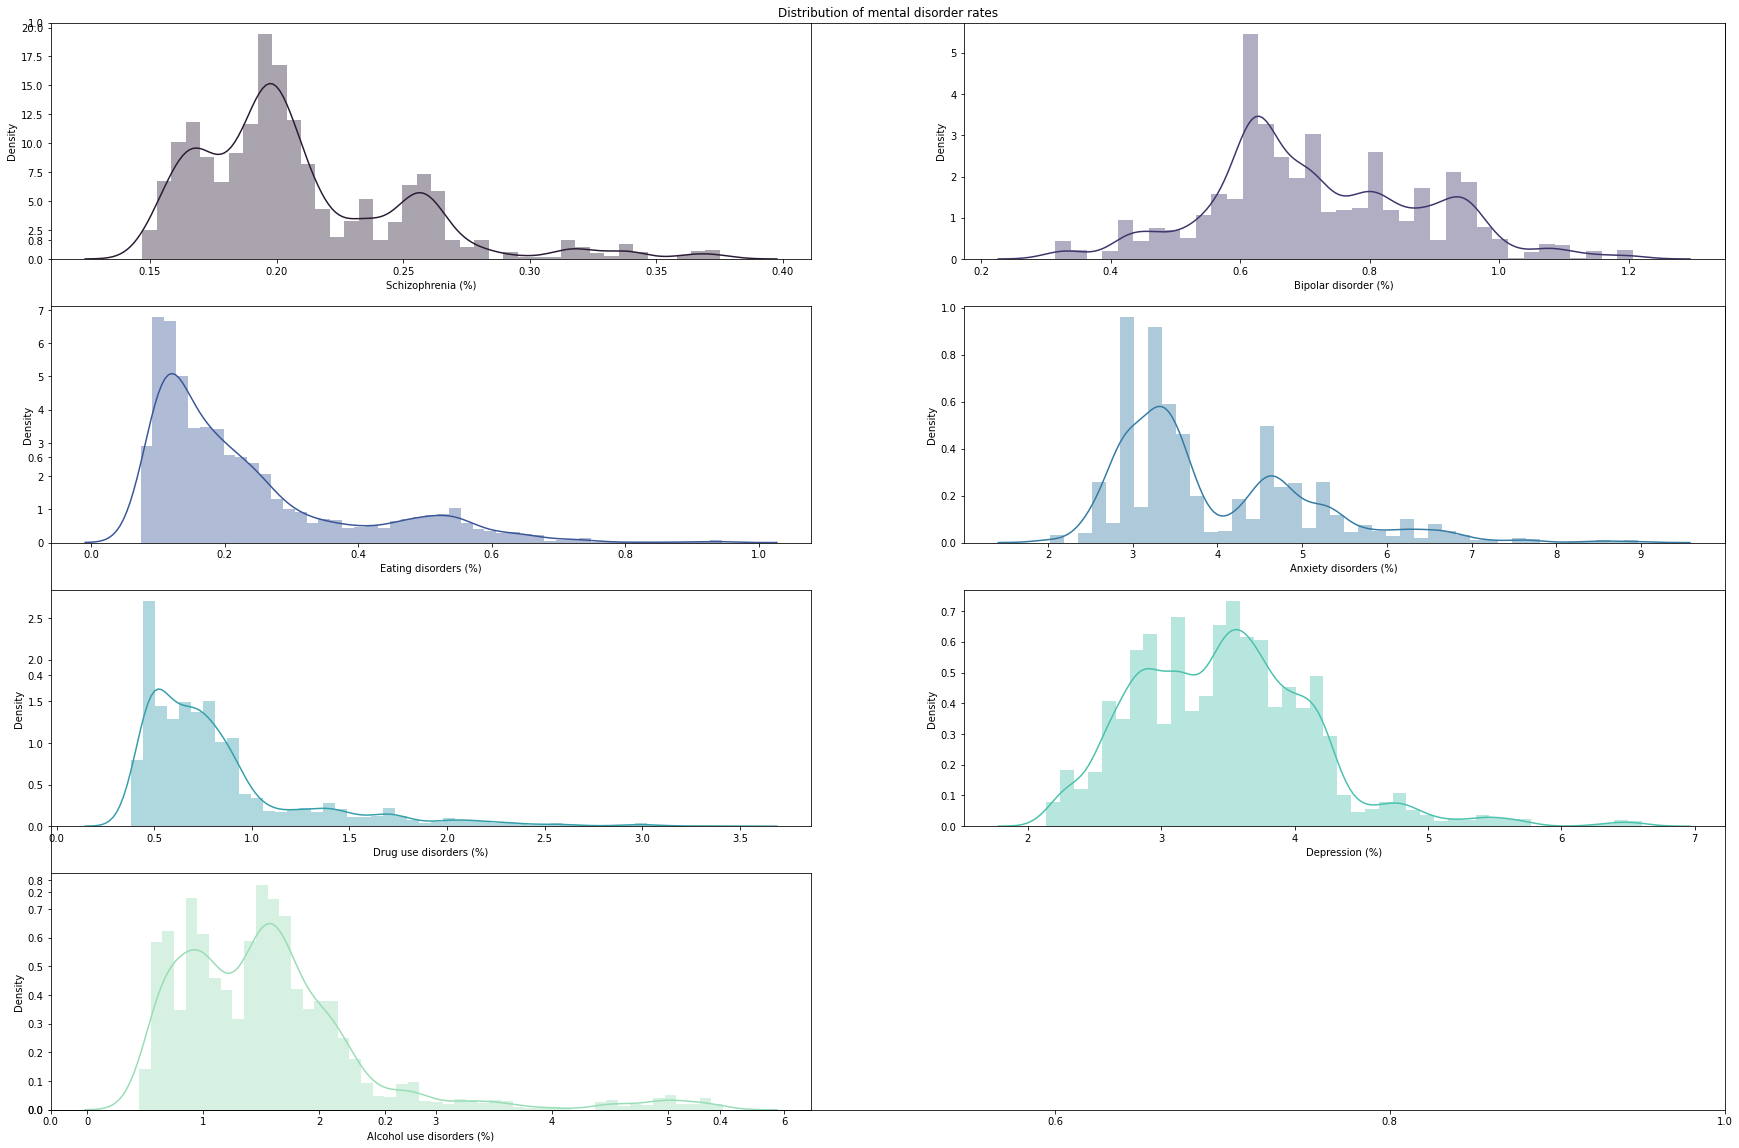

In [72]:
fig_1=plt.figure(figsize=(30,20))
plt.title('Distribution of mental disorder rates')
for i in range(0,7):
    ax=f"ax_{'i'}"
    ax=fig_1.add_subplot(4,2,i+1)
    #sb.distplot(data_for_graphs.iloc[:,i], color=sb.color_palette(palette='pastel')[i])
    sb.distplot(data_for_graphs.iloc[:,i], color=sb.color_palette('mako',7)[i])

The correlation matrix that we have created in the exploration step can be visualized with a Heat Map that highlights stronger correlation with darker colours.

<AxesSubplot:>

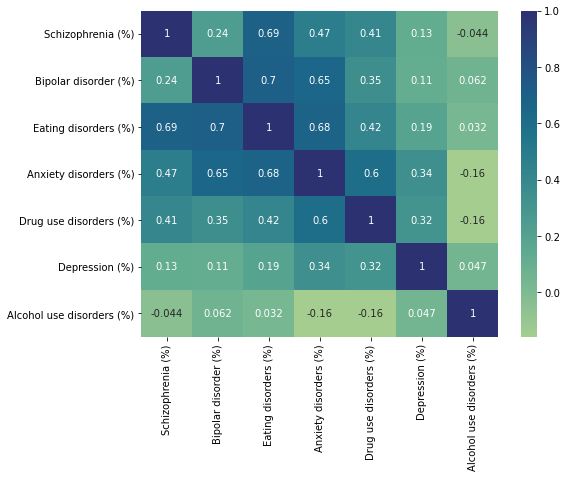

In [73]:
import seaborn as sb
plt.figure(figsize=(8,6))
sb.heatmap(data_for_graphs.corr(), cmap=sb.color_palette("crest", as_cmap=True),annot=True)

We can choose an year (for example 2017) and we can see the associations between the mental disorders through a scatter plot.

In [74]:
data_for_scatter=data.query('Year == 2017')
data_for_scatter=data_for_scatter[['Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)']]

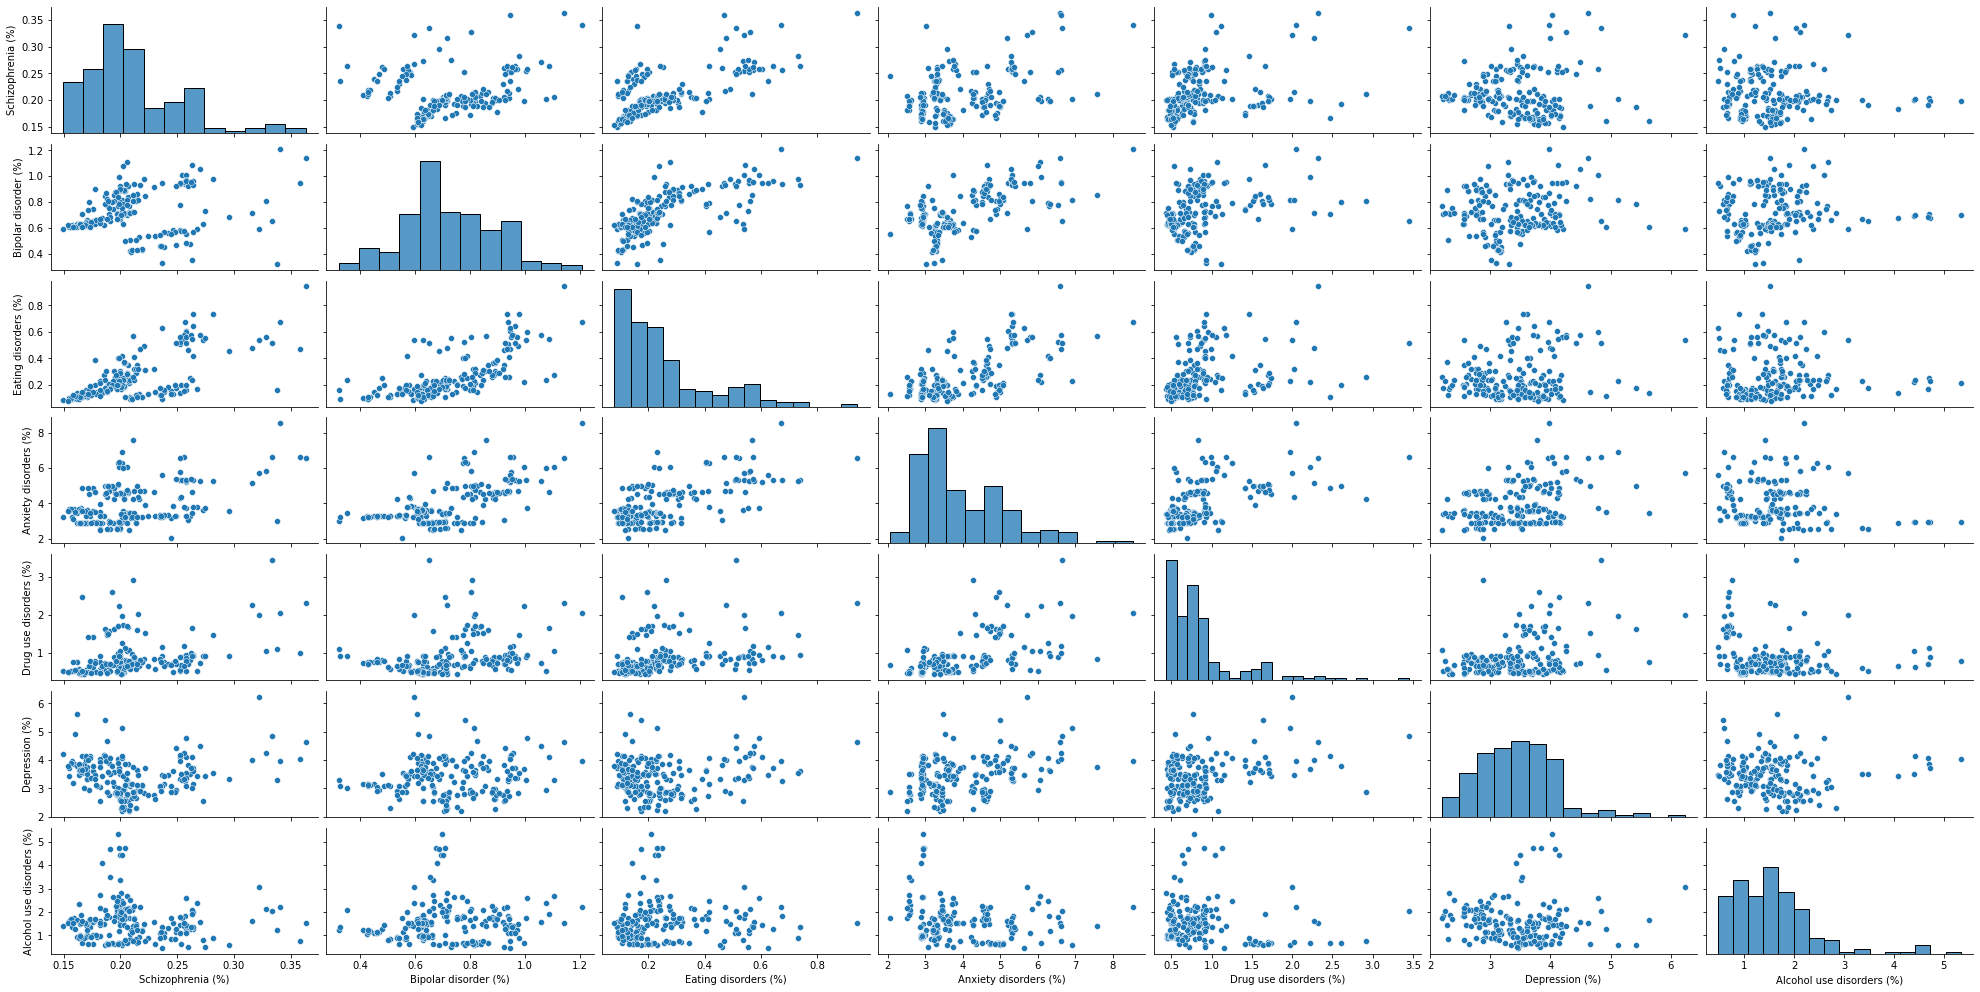

In [75]:
sb.pairplot(data_for_scatter, height=2, aspect=2)

We can actually see that schizofrenia and eating disorders and bipolar disorder and eating disorders are the stronger relationships.

With a line plot, we can see the trend over time of different mental disorder rates in different countries. 
Since we have seen that anxiety and depression are the most common mental disorders, we want to analyze if there are substantial differences between countries.
We consider 10 different countries (with different cultures and ways of living), including the ones that, from previous analysis, seem to have particular values: Italy, New Zeleand, Norway, Greenland, UK, USA, Albania, Morocco, Japan, Lesotho.

In [76]:
italy=data[data['Country']=='Italy']
NZ=data[data['Country']=='New Zealand']
Norway=data[data['Country']=='Norway']
Greenland=data[data['Country']=='Greenland']
UK=data[data['Country']=='United Kingdom']
USA=data[data['Country']=='United States']
Albania=data[data['Country']=='Albania']
morocco=data[data['Country']=='Morocco']
japan=data[data['Country']=='Japan']
Lesotho=data[data['Country']=='Lesotho']

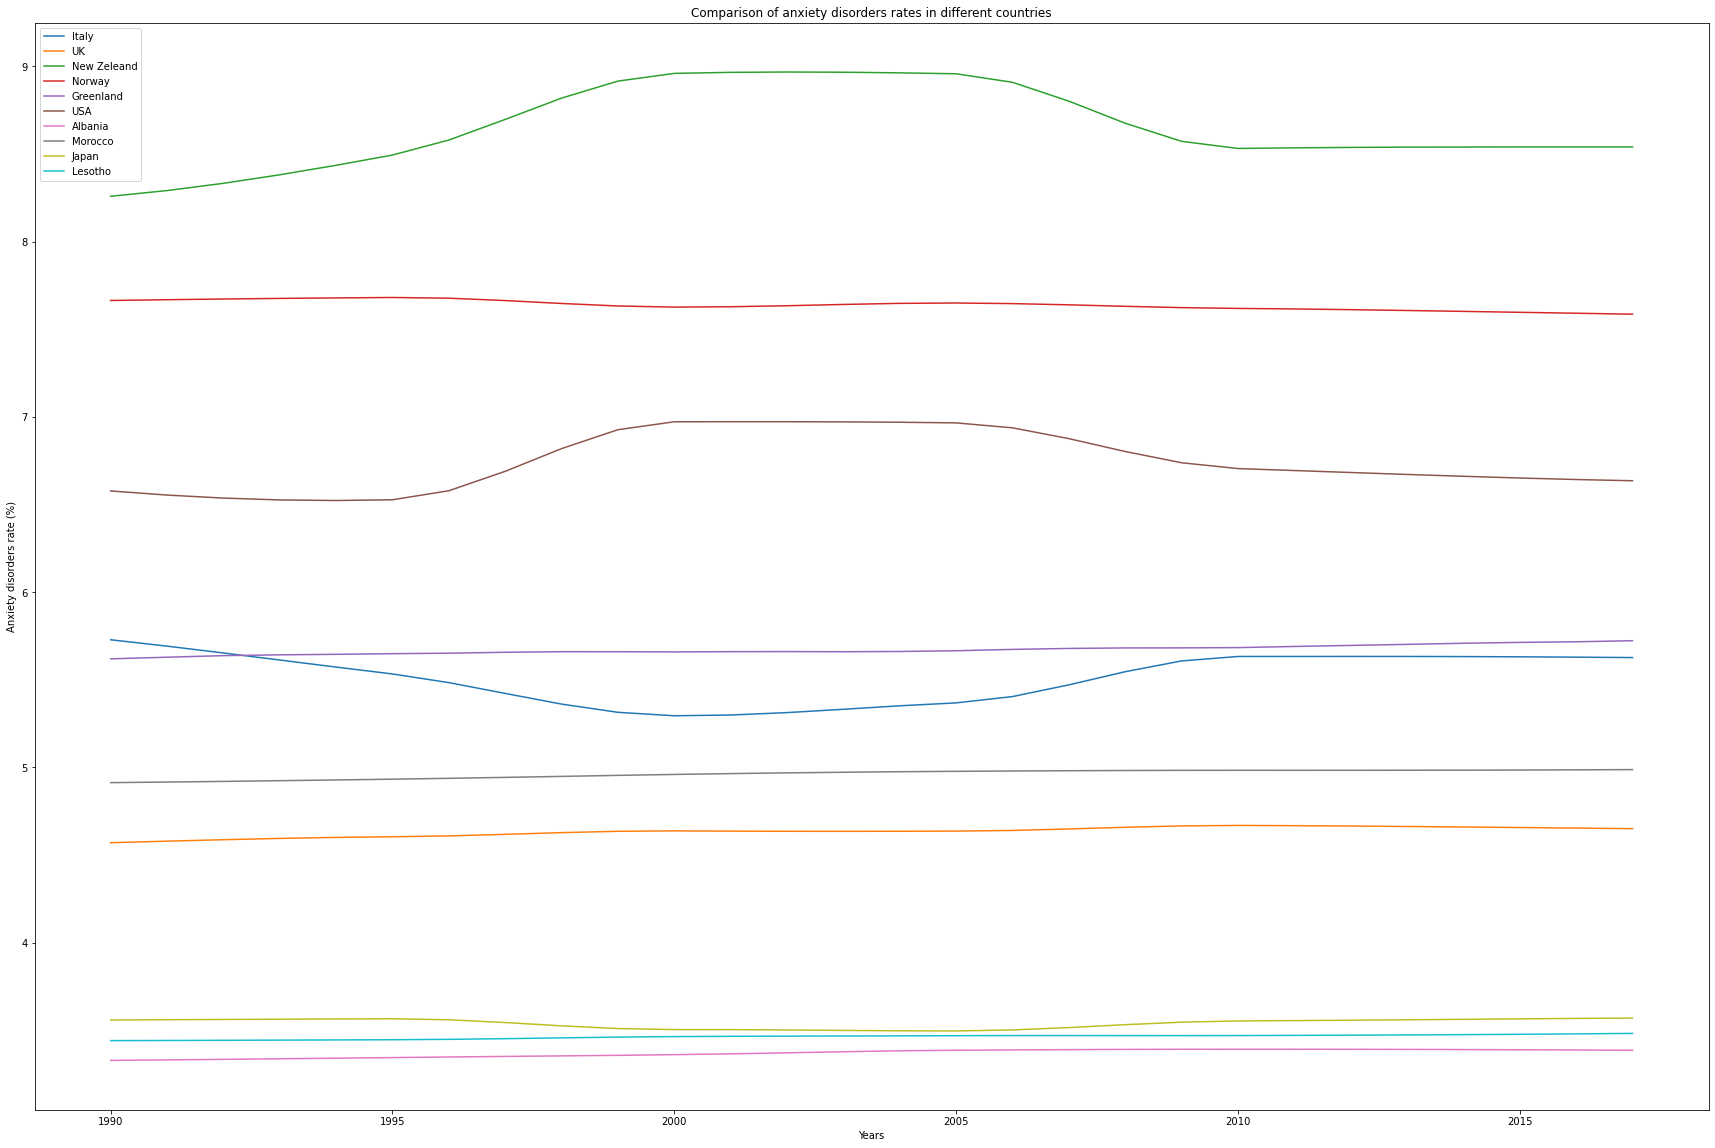

In [77]:
plt.figure(figsize=(30, 20))
plt.title('Comparison of anxiety disorders rates in different countries')
plt.plot(italy['Year'], italy['Anxiety disorders (%)'], label='Italy')
plt.plot(UK['Year'], UK['Anxiety disorders (%)'], label='UK')
plt.plot(NZ['Year'], NZ['Anxiety disorders (%)'], label='New Zeleand')
plt.plot(Norway['Year'], Norway['Anxiety disorders (%)'], label='Norway')
plt.plot(Greenland['Year'], Greenland['Anxiety disorders (%)'], label='Greenland')
plt.plot(USA['Year'], USA['Anxiety disorders (%)'], label='USA')
plt.plot(Albania['Year'], Albania['Anxiety disorders (%)'], label='Albania')
plt.plot(morocco['Year'], morocco['Anxiety disorders (%)'], label='Morocco')
plt.plot(japan['Year'], japan['Anxiety disorders (%)'], label='Japan')
plt.plot(Lesotho['Year'], Lesotho['Anxiety disorders (%)'], label='Lesotho')
plt.xlabel('Years')
plt.ylabel('Anxiety disorders rate (%)')
plt.legend()
plt.show()

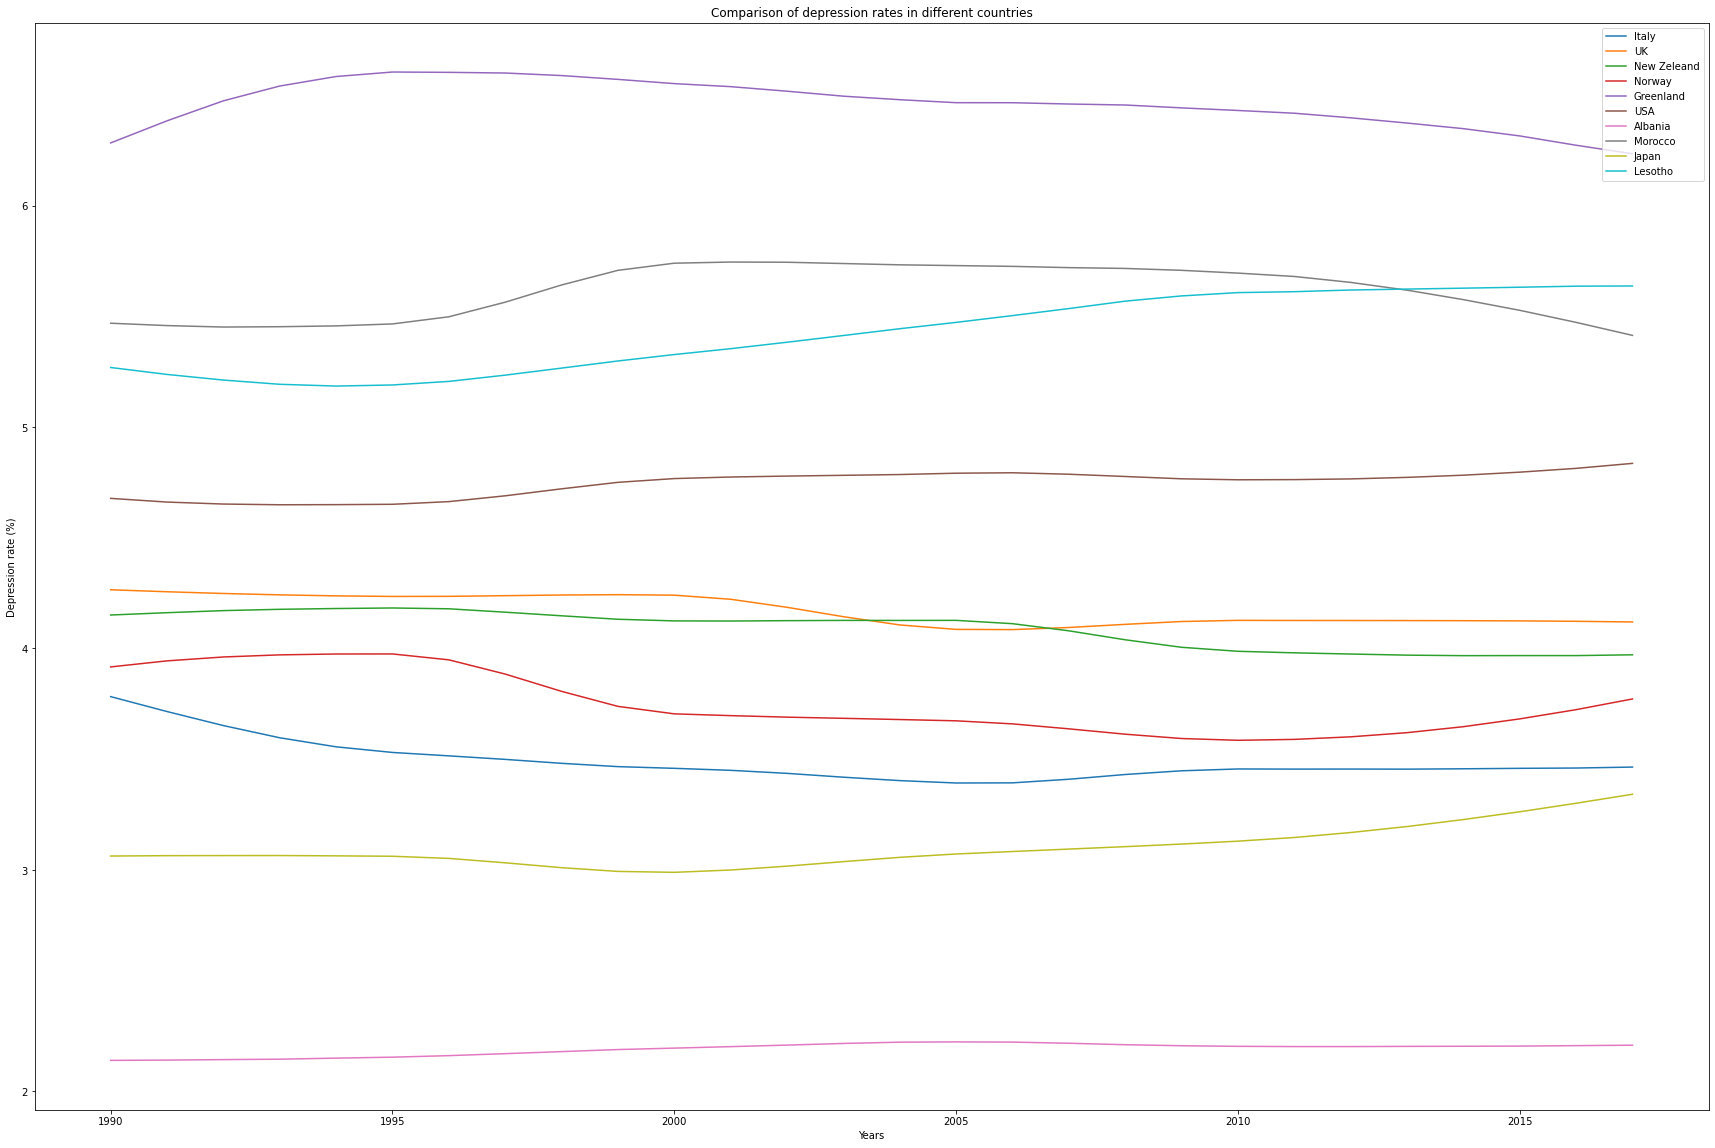

In [78]:
plt.figure(figsize=(30, 20))
plt.title('Comparison of depression rates in different countries')
plt.plot(italy['Year'], italy['Depression (%)'], label='Italy')
plt.plot(UK['Year'], UK['Depression (%)'], label='UK')
plt.plot(NZ['Year'], NZ['Depression (%)'], label='New Zeleand')
plt.plot(Norway['Year'], Norway['Depression (%)'], label='Norway')
plt.plot(Greenland['Year'], Greenland['Depression (%)'], label='Greenland')
plt.plot(USA['Year'], USA['Depression (%)'], label='USA')
plt.plot(Albania['Year'], Albania['Depression (%)'], label='Albania')
plt.plot(morocco['Year'], morocco['Depression (%)'], label='Morocco')
plt.plot(japan['Year'], japan['Depression (%)'], label='Japan')
plt.plot(Lesotho['Year'], Lesotho['Depression (%)'], label='Lesotho')
plt.xlabel('Years')
plt.ylabel('Depression rate (%)')
plt.legend()
plt.show()

From these graphs, we can notice different aspects of the topic. For the analyzed countries, we can see some "ups" and "downs" during some periods, but the trends are almost costant in time. USA and New Zealand anxiety prevalence follow the same path, as they both got higher after 1995, stayed constand on high values and then started descending in the first years of 2000s. In Italy the anxiety prevalence followed a downgrade until 2000, then it grows until 2010 and then it mantained a constant value. For what concerns depression prevalence, in the last years analyzed it is descending in Greenland and Morocco, but it has an ascending trend in Japan, USA, Italy and Norway. As we expected from previous analysis, there are big differences between countries. Japan and Albania are the countries with the lowest prevalence of people suffering from both anxiety disorders and depression, while Lesotho, that have very low level of anxiety disorders, has one of the highest prevalence for depression. Also New Zealand has the highest value for anxiety but a lower value for depression, even though it is still higher than the average value for depression for every country. 

#### DIFFERENCE BETWEEN MALES AND FEMALES

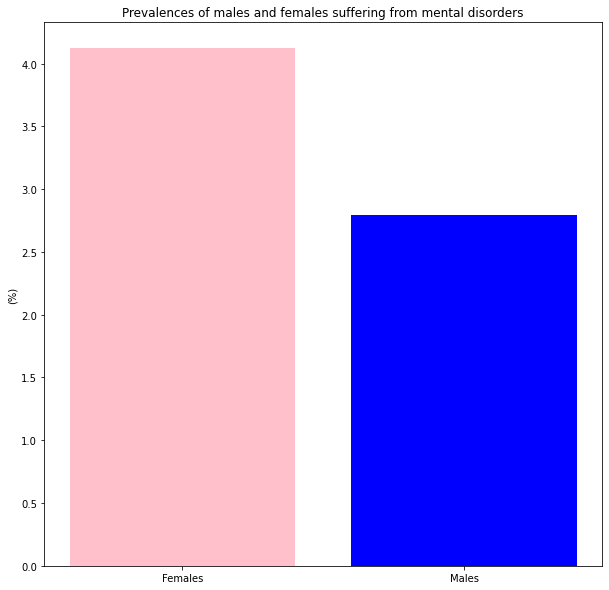

In [110]:
data_for_bar=data[['Prevalence in males (%)','Prevalence in females (%)']].mean().sort_values(ascending=False).reset_index() 
plt.figure(figsize=(10, 10))
plt.bar(['Females','Males'], data_for_bar[0], color=['pink', 'blue'])
plt.title('Prevalences of males and females suffering from mental disorders')
plt.ylabel('(%)')
plt.show()

Is the difference between males and females the same between countries? Let's compute it with line plots. We consider the 10 countries analyzed before.

In [94]:
Italy=data[data['Country']=='Italy']
NZ=data[data['Country']=='New Zealand']
Norway=data[data['Country']=='Norway']
Greenland=data[data['Country']=='Greenland']
UK=data[data['Country']=='United Kingdom']
USA=data[data['Country']=='United States']
Albania=data[data['Country']=='Albania']
Morocco=data[data['Country']=='Morocco']
Japan=data[data['Country']=='Japan']
Lesotho=data[data['Country']=='Lesotho']

In [104]:
list_of_countries=[Italy, NZ, Norway, Greenland, UK, USA, Albania, Morocco, Japan, Lesotho]
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

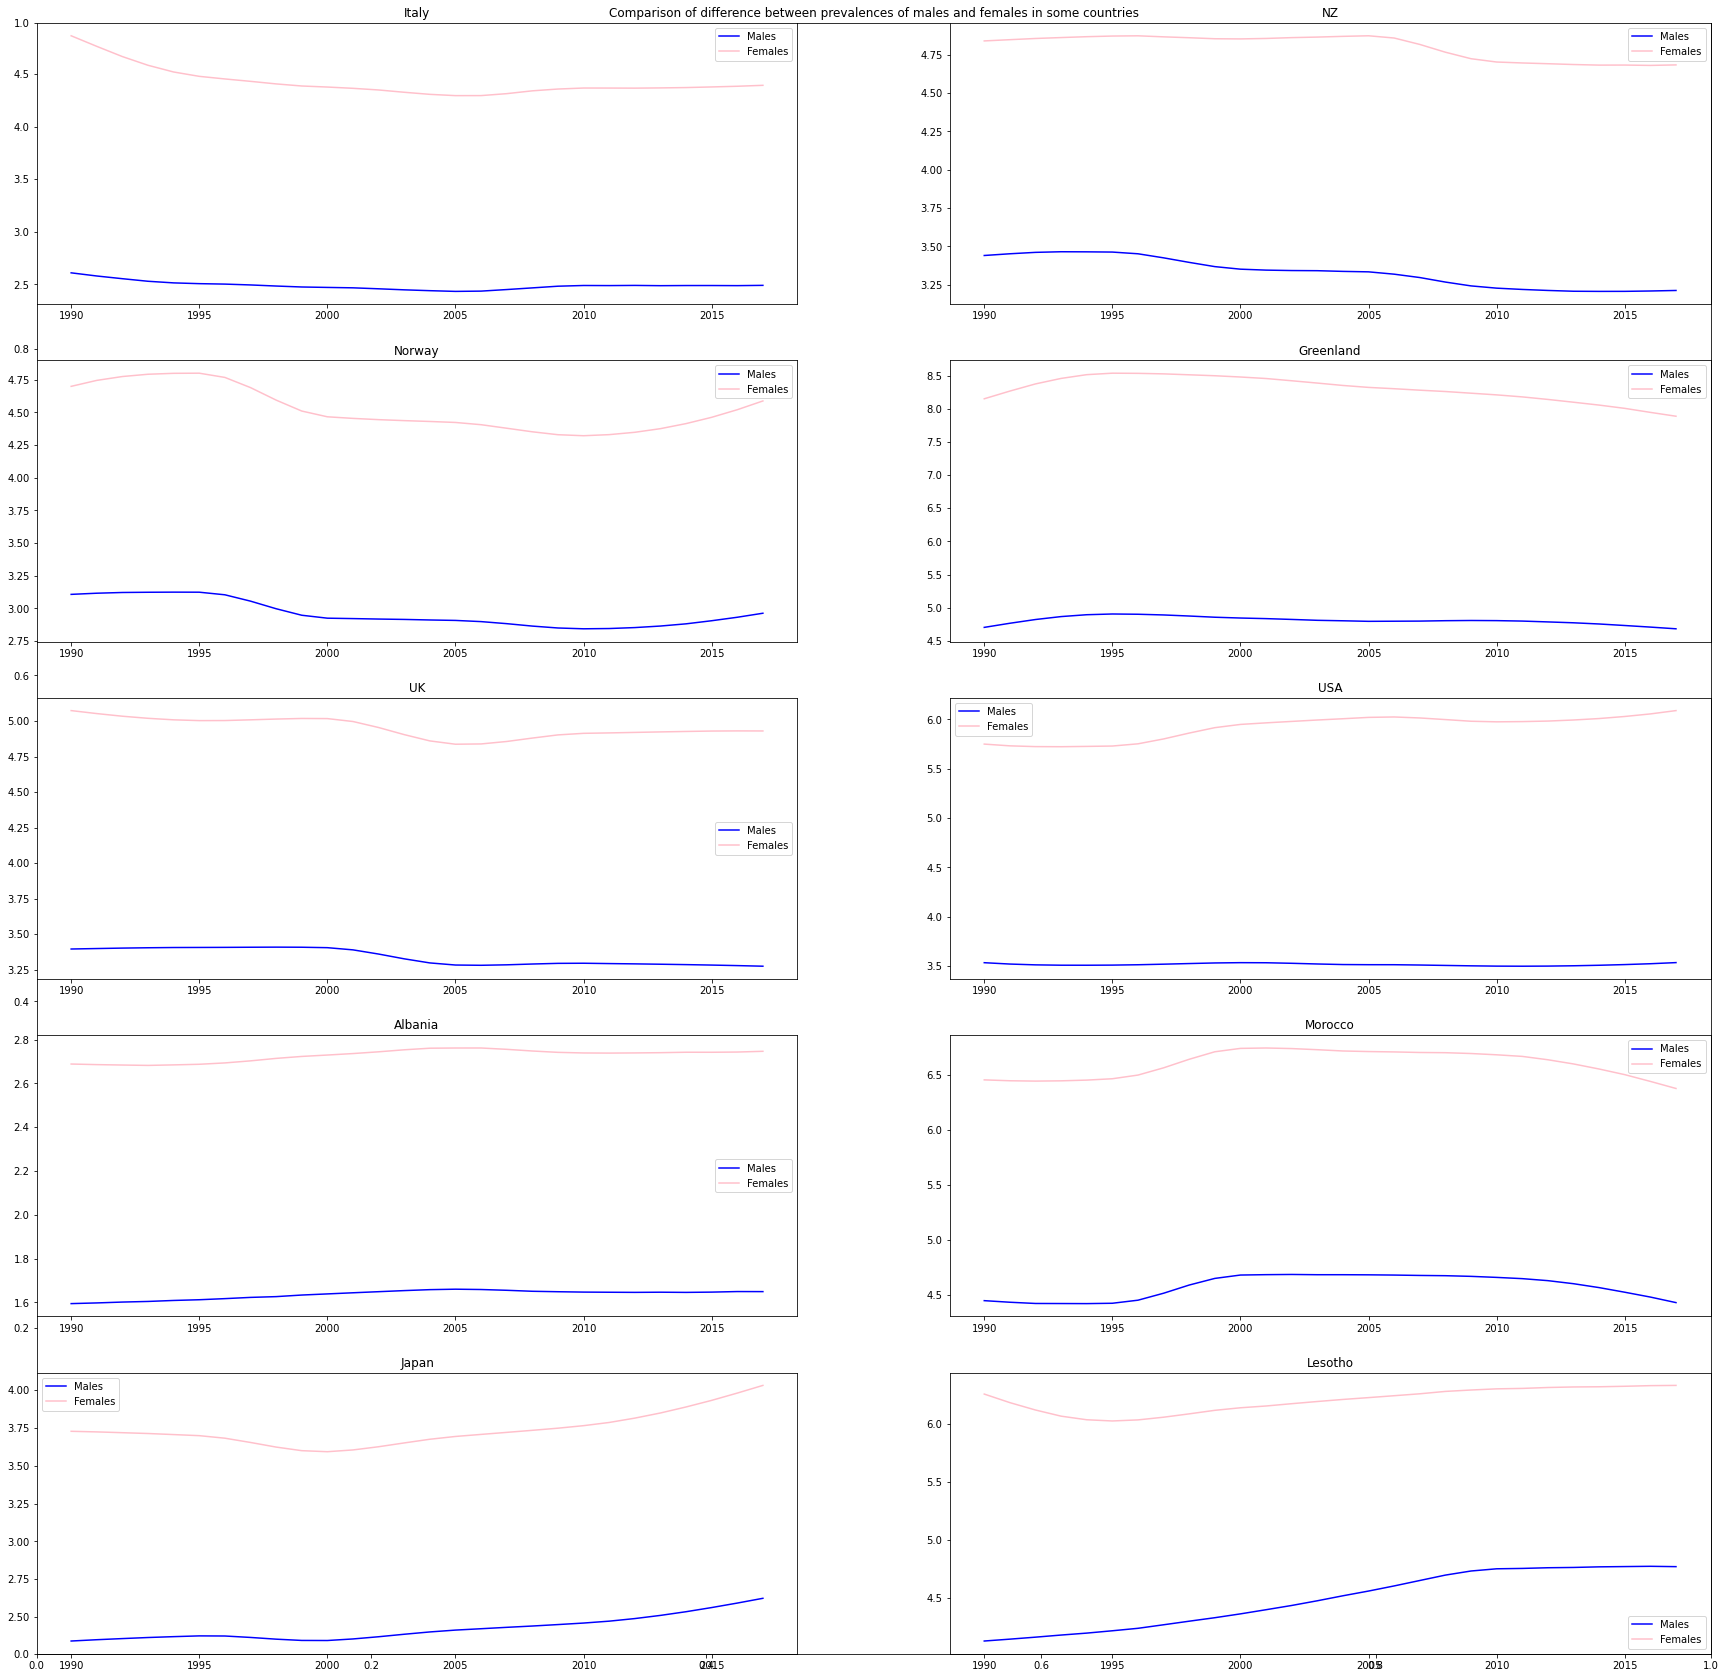

In [125]:
fig_1=plt.figure(figsize=(30,30))
plt.title('Comparison of difference between prevalences of males and females in some countries')
for i in range(len(list_of_countries)):
    ax=f"ax_{'i'}"
    ax=fig_1.add_subplot(5,2,i+1)
    ax.plot(np.array(list_of_countries[i]['Year']), np.array(list_of_countries[i]['Prevalence in males (%)']), label='Males', color='blue')
    ax.plot(np.array(list_of_countries[i]['Year']), np.array(list_of_countries[i]['Prevalence in females (%)']), label='Females', color='pink')
    ax.legend()
    plt.title(f"{get_df_name(list_of_countries[i])}")

In the countries that we are exploring, the prevalence of women with mental disorders is always higher than the prevalence of males.

#### RELATION BETWEEN SUICIDE AND DEPRESSION RATES

It can be interesting to check what is the relation between depression rate and suicide rate, since depression is the main cause of suicide. <br> We investigate it through a scatter plot.

In [82]:
data_suicide_depr=data[['Suicide rate (deaths per 100,000 individuals)','Depressive disorder rates (number suffering per 100,000)']]

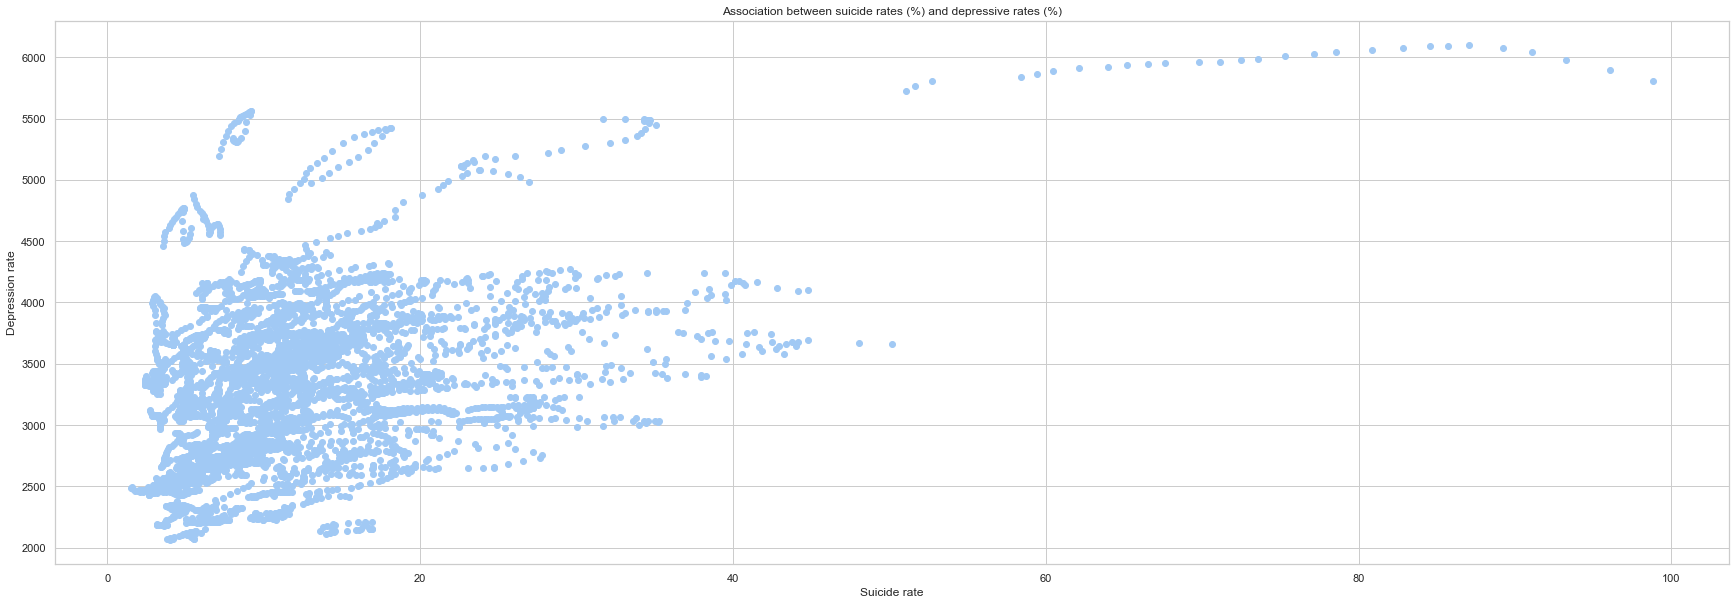

In [249]:
plt.figure(figsize=(30,10))
plt.title('Association between suicide rates (%) and depressive rates (%)')
plt.scatter(data_suicide_depr['Suicide rate (deaths per 100,000 individuals)'], data_suicide_depr['Depressive disorder rates (number suffering per 100,000)'], cmap='Blues')
plt.xlabel('Suicide rate')
plt.ylabel('Depression rate')
plt.show()

If we do the same analysis divided by the countries we have analyzed before, we obtain the following results:

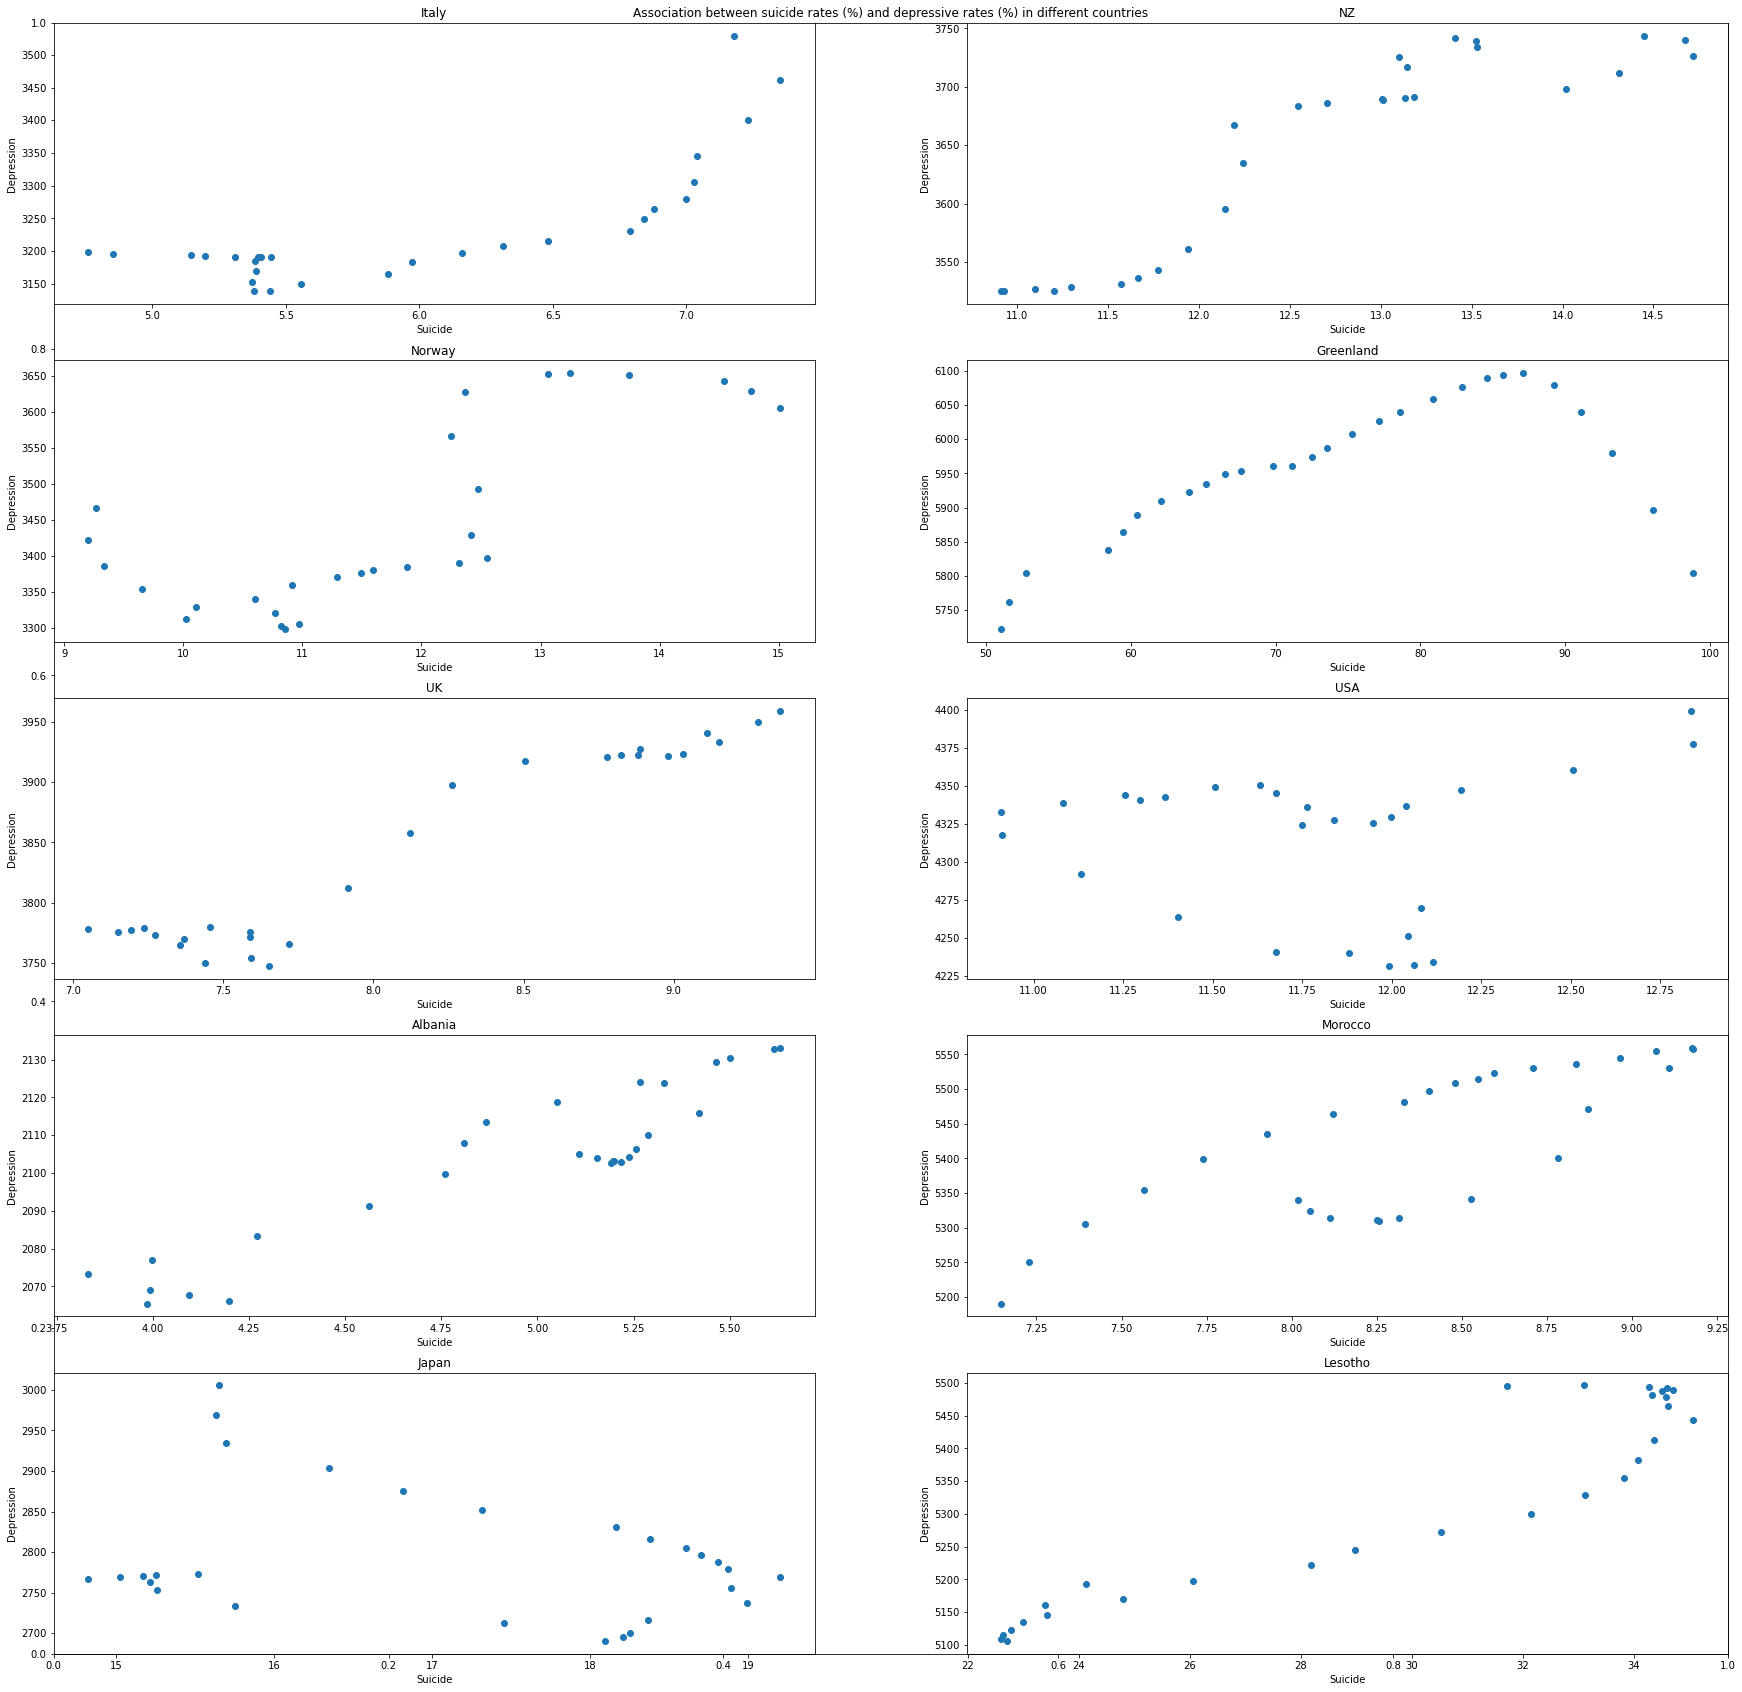

In [136]:
fig_1=plt.figure(figsize=(30,30))
plt.title('Association between suicide rates (%) and depressive rates (%) in different countries')
for i in range(len(list_of_countries)):
    ax=f"ax_{'i'}"
    ax=fig_1.add_subplot(5,2,i+1)
    ax.scatter(np.array(list_of_countries[i]['Suicide rate (deaths per 100,000 individuals)']), np.array(list_of_countries[i]['Depressive disorder rates (number suffering per 100,000)']))
    plt.xlabel('Suicide')
    plt.ylabel('Depression')
    plt.title(f"{get_df_name(list_of_countries[i])}")

For some countries (for example Japan, Lesotho and UK) we can foresee a linear relationship. This will be the object of further analysis.

Finally, we can create geographic maps to visualize the average prevalence of anxiety disorders and depression. The darker countries are the ones with higher values, the lighter ones have lower values.

In [231]:
data_mean_with_code = data1.groupby('Code').mean()

In [243]:
countries=pd.read_csv('countries_codes_and_coordinates.csv')
countries=countries[['Alpha-3 code','Latitude (average)','Longitude (average)']]
for i in range(len(countries.iloc[0])):
    countries.iloc[:,i]=countries.iloc[:,i].map(lambda x:x.replace('"',''))
    countries.iloc[:,i]=countries.iloc[:,i].map(lambda x:x.replace(' ',''))

In [245]:
#Anxiety disorders
merged_data=pd.merge(data_mean_with_code, countries,  right_on='Alpha-3 code', left_on='Code').sort_values(by='Anxiety disorders (%)',ascending=False).reset_index()
#'naturalearth_lowres' is geopandas dataset that we need to create the geographic map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'Alpha-3 code', 'gdp_md_est', 'geometry']
merged_data2=pd.merge(world,merged_data,on='Alpha-3 code')

Text(0.5, 1.0, 'Anxiety disorders (%)')

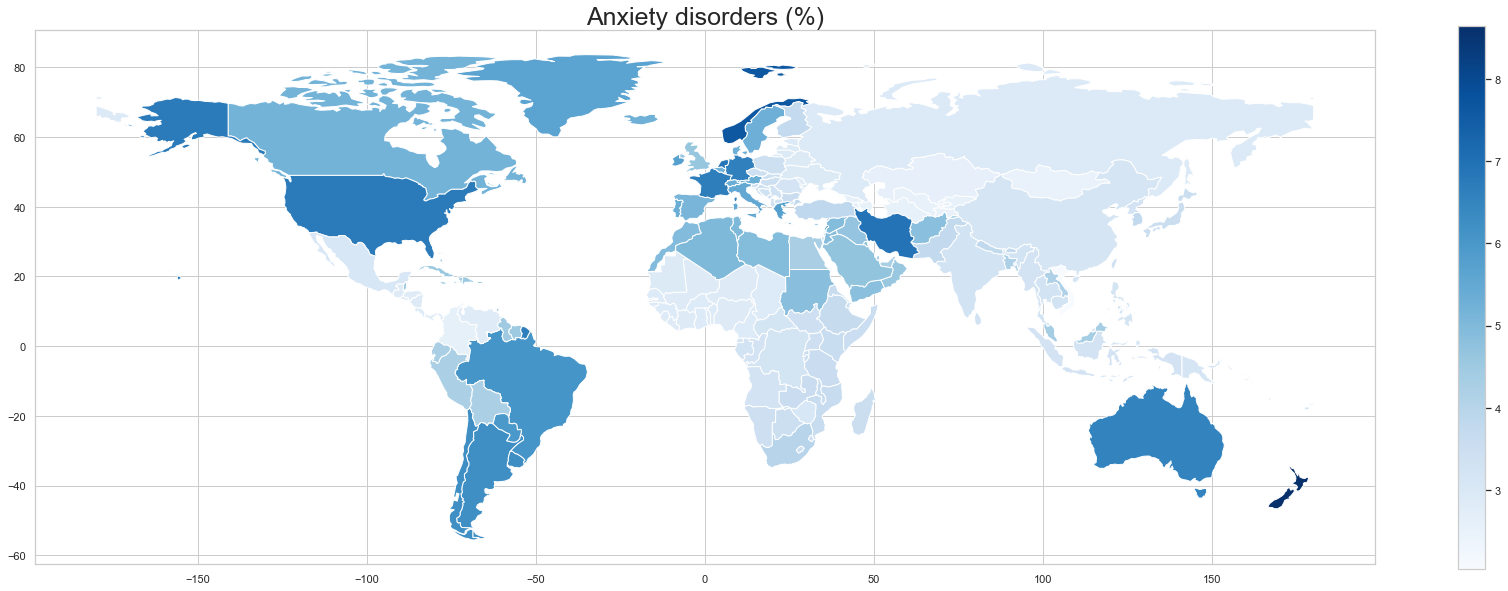

In [246]:
merged_data2.plot(column='Anxiety disorders (%)',
            figsize=(30,10),
            legend=True, cmap='Blues')
plt.title('Anxiety disorders (%)',fontsize=25)

In [247]:
#Depression
merged_data=pd.merge(data_mean_with_code, countries,  right_on='Alpha-3 code', left_on='Code').sort_values(by='Depression (%)',ascending=False).reset_index()
merged_data2=pd.merge(world,merged_data,on='Alpha-3 code')

Text(0.5, 1.0, 'Depression (%)')

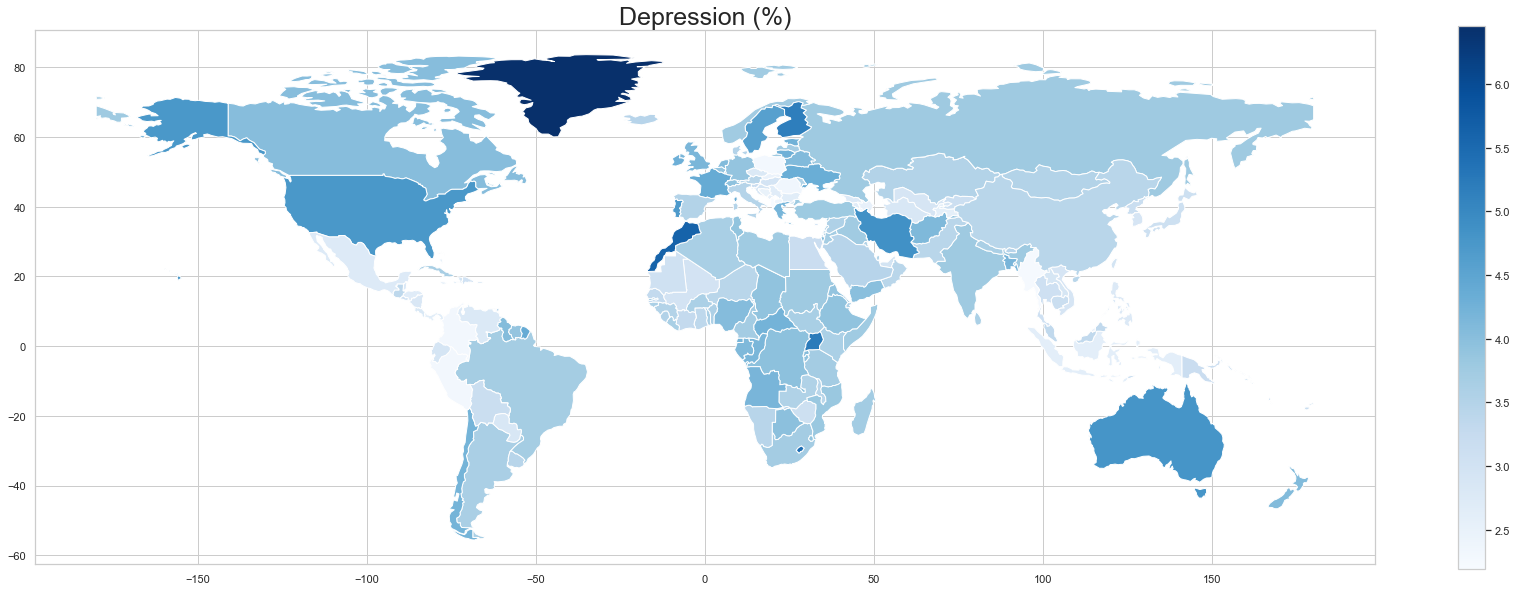

In [248]:
merged_data2.plot(column='Depression (%)',
            figsize=(30,10),
            legend=True, cmap='Blues')
plt.title('Depression (%)',fontsize=25)

# OK FINO A QUI

In [151]:
from sklearn.cluster import KMeans

In [152]:
square_distances = []
x = data1[['Anxiety disorders (%)', 'Depression (%)']]
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    square_distances.append(km.inertia_)

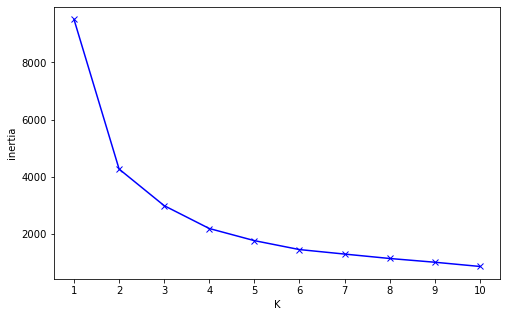

In [153]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), square_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('inertia')
plt.xticks(list(range(1,11)))
plt.show()

In [154]:
km = KMeans(n_clusters=5, random_state=42)
y_pred = km.fit_predict(x)

No handles with labels found to put in legend.


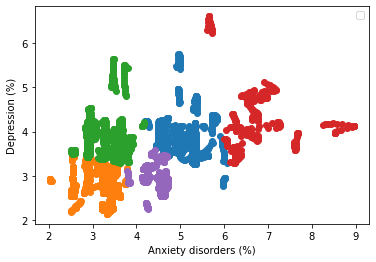

In [156]:
plt.figure(figsize=(6,4))
#labels = ['normal', 'cheap', 'poor', 'risky', 'safe']
for i in range(5):
    plt.scatter(x.loc[y_pred==i, 'Anxiety disorders (%)'], x.loc[y_pred==i, 'Depression (%)'], 
                #label=labels[i]
               )
plt.xlabel('Anxiety disorders (%)')
plt.ylabel('Depression (%)')
plt.legend()
plt.show()